In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.models import load_model
from keras.applications.nasnet import NASNetLarge
from keras.preprocessing import image
from keras.applications.nasnet import preprocess_input
from keras.models import Model

In [4]:
base_model = NASNetLarge(weights='imagenet', include_top=False)
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('normal_add_5_16').output)
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('normal_conv_1_1').output)
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('reduction_add_1_stem_1').output)
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('stem_conv1').output) 
model = Model(inputs=base_model.input, outputs=base_model.get_layer('normal_add_5_18').output)

In [6]:
## added to test 
nasl_input = base_model.input
nasl_layers = base_model.layers
base_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_2_normal_left1_10[
__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_2_normal_right1_10
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_2_normal_left2_10[
__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_2_normal_right2_10
__________________________________________________________________________________________________
normal_left3_10 (AveragePooling (None, 21, 21, 336)  0           normal_bn_1_10[0][0]             
__________

In [7]:
## added to test 
layer_outputs = [layer.output for layer in nasl_layers]
features = Model(inputs = nasl_input, outputs = layer_outputs)

In [8]:
## added to test
img = np.random.random((1,331,331,3)).astype("float32")
extracted_features = features(img)

In [9]:
## added to test

img_path = "../../../data_single/data_individual_converted/par1/par1b1_s_004.jpg"
img = image.load_img(img_path, target_size=(331,331))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
x = preprocess_input(x)

In [10]:
extracted_features=features(x)

In [11]:
f1 = extracted_features[0]
print("\n f1.shape: ", f1.shape)


 f1.shape:  (1, 331, 331, 3)


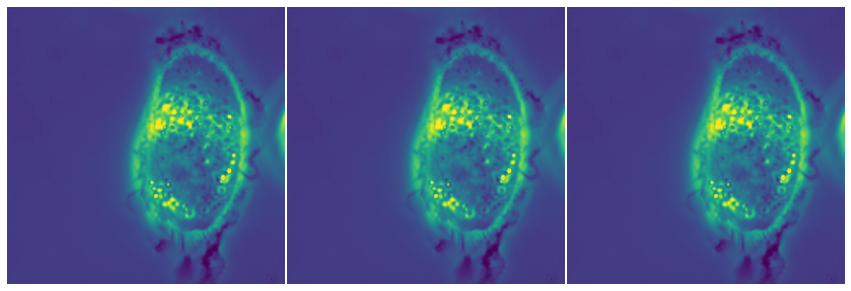

In [12]:
img = f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(img[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


 f2.shape:  (1, 165, 165, 96)


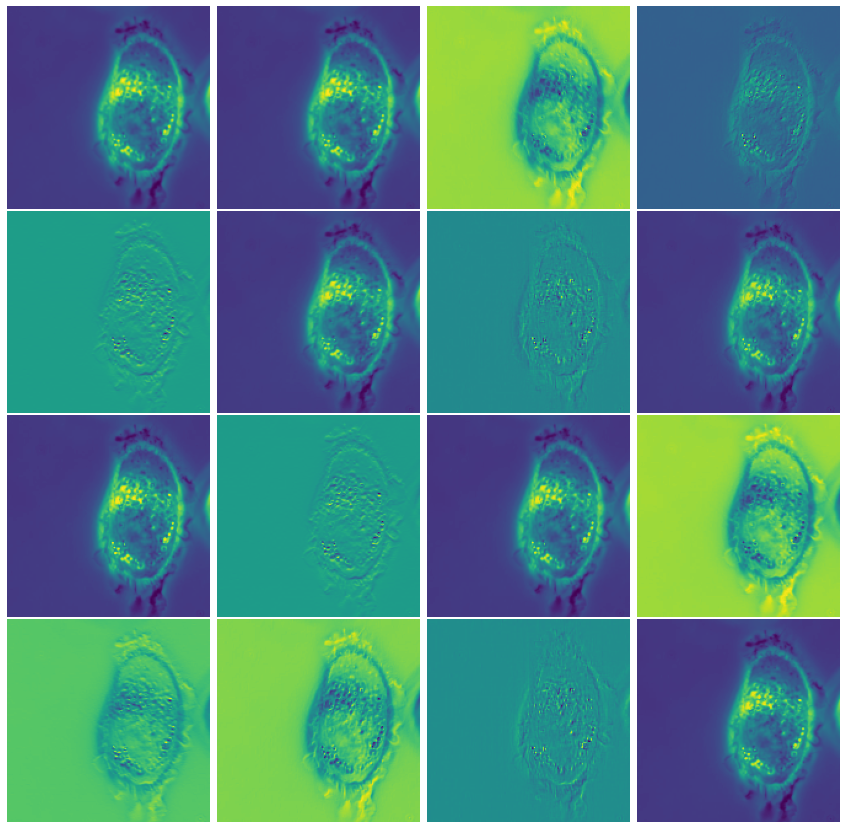

In [13]:
f2 = extracted_features[1]
print("\n f2.shape: ", f2.shape)

img = f2[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(img[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [14]:
extracted_features_activation_2 = Model(inputs=features.input, outputs=features.get_layer("activation_2").output)
activation_2_features = extracted_features_activation_2.predict(x)

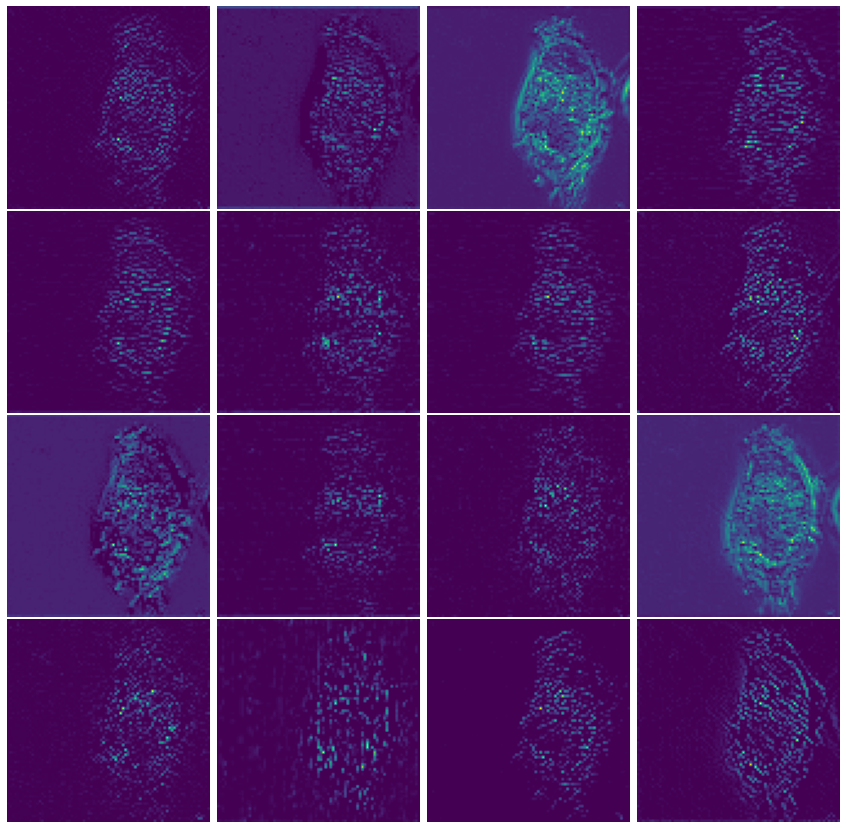

In [18]:
imgs = activation_2_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [19]:
extracted_features_activation_258 = Model(inputs=features.input, outputs=features.get_layer("activation_258").output)
activation_258_features = extracted_features_activation_258.predict(x)

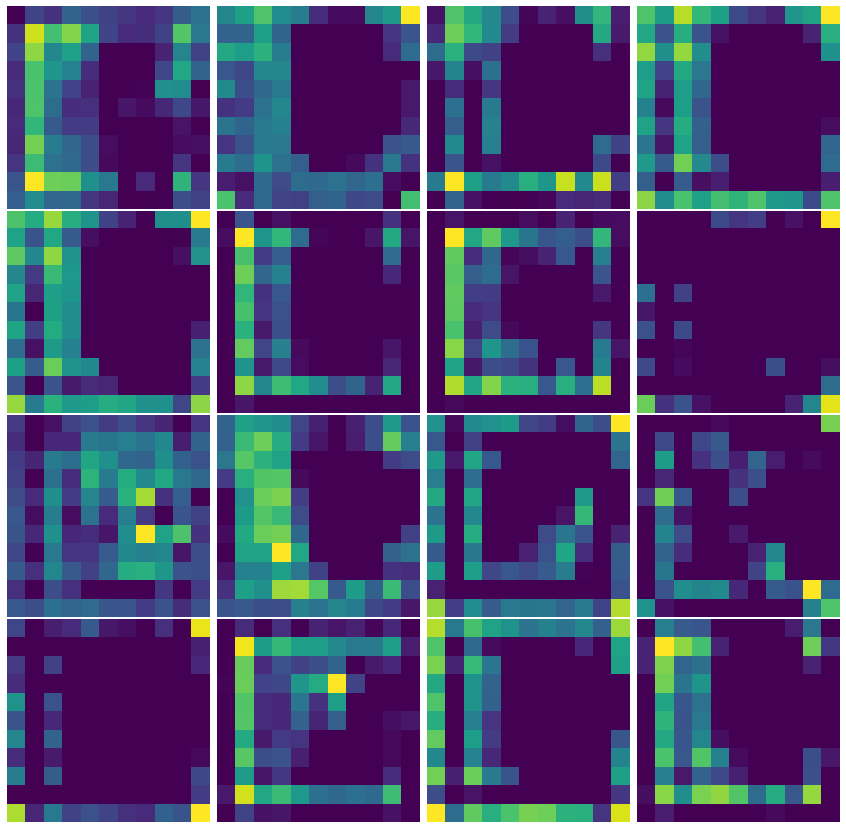

In [20]:
imgs = activation_258_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [21]:
extracted_features_normal_right4_18 = Model(inputs=features.input, outputs=features.get_layer("normal_right4_18").output)
normal_right4_18_features = extracted_features_normal_right4_18.predict(x)

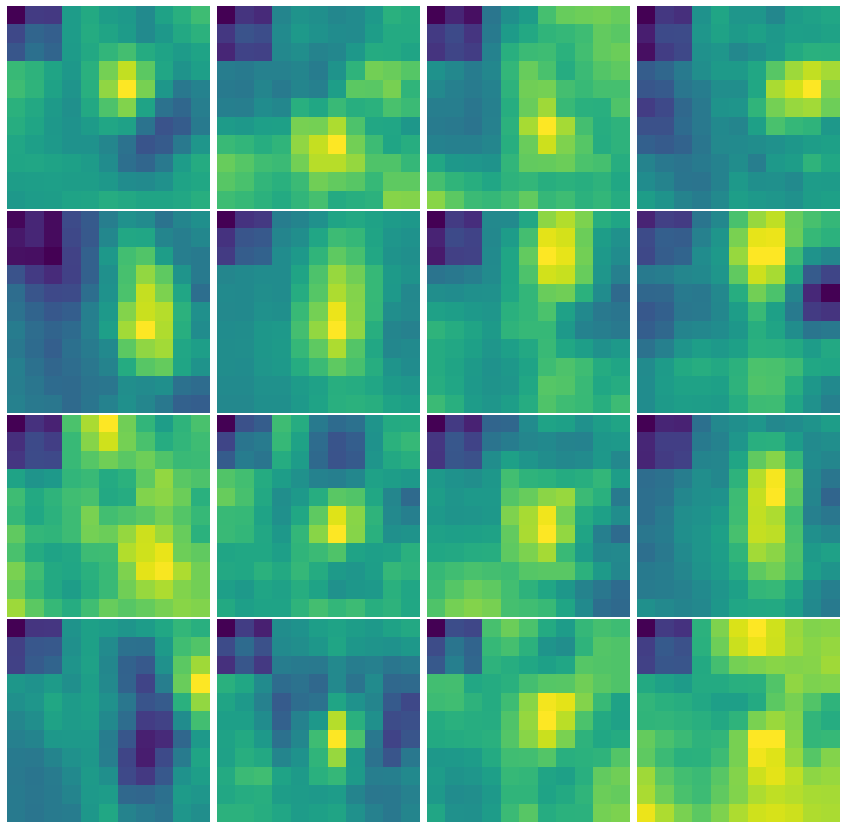

In [22]:
imgs = normal_right4_18_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [23]:
extracted_features_activation_259 = Model(inputs=features.input, outputs=features.get_layer("activation_259").output)
activation_259_features = extracted_features_activation_259.predict(x)

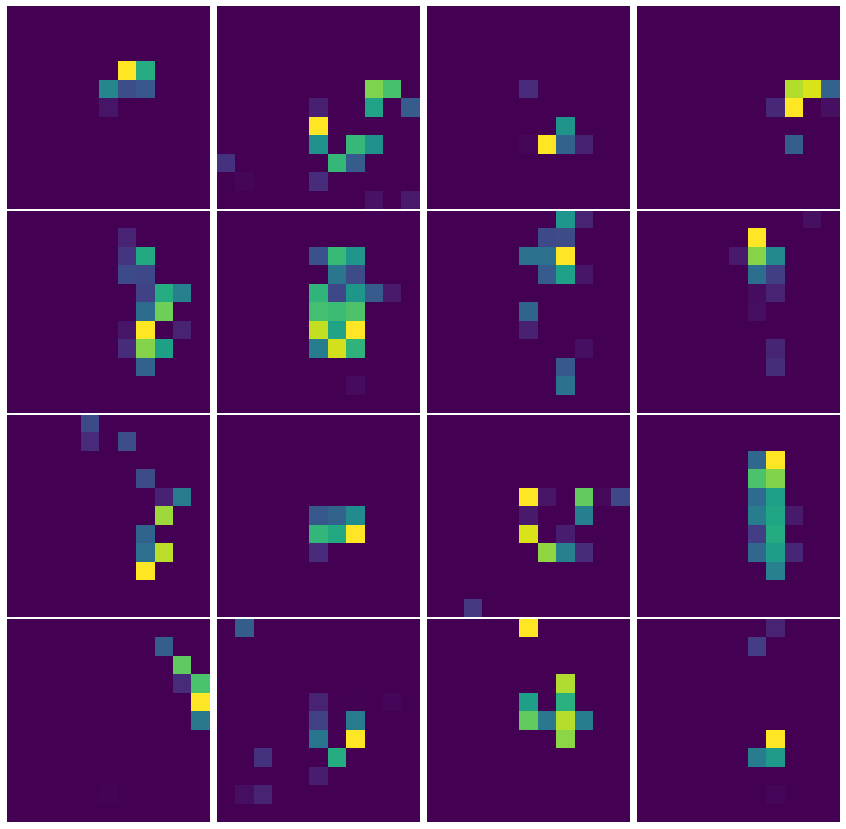

In [24]:
imgs = activation_259_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [5]:
# select image and preprocess
img_path = '../../../data_grayscale_split/train/par1/par1_001.jpg'
img = image.load_img(img_path, target_size=(331,331))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

## extract the features
# normal_add_5_16_features = model.predict(x)
extracted_features = model.predict(x)
# extracted_feature = model(x)

In [35]:
# f1 = normal_add_5_16_features[0]
f1 = extracted_features[0]
print("\n f1.shape: ", f1.shape)


 f1.shape:  (11, 11, 672)


In [36]:
## visualize the input channel
imgs = f1[0,:,:]
plt.figure(figsize=(5,5))
for n in range(3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(imgs[:,:])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

##### VGG19

In [39]:
from keras.applications.vgg19 import VGG19
vgg_model = VGG19(weights='imagenet')

In [41]:
vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [42]:
layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs = vgg_input, outputs = layer_outputs)

In [44]:
img = np.random.random((1,224,224,3)).astype("float32")
extracted_features = features(img)

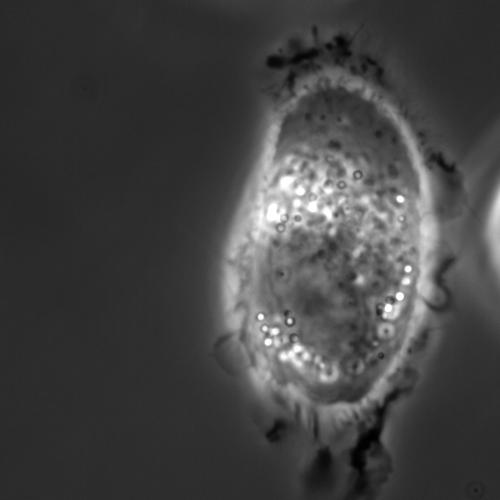

In [116]:
import IPython.display as display
from PIL import Image

display.display(Image.open("../../../data_single/data_individual_converted/par1/par1b1_s_004.jpg"))
# display.display(Image.open("../../cool_cat.jpg"))
# display.display(Image.open("train_image.jpg"))

In [117]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

# img_path = "../../cool_cat.jpg"
# img_path = "train_image.jpg"
img_path = "../../../data_single/data_individual_converted/par1/par1b1_s_004.jpg"
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
x = preprocess_input(x)

In [118]:
extracted_features=features(x)

In [119]:
f1 = extracted_features[0]
print("\n f1.shape: ", f1.shape)


 f1.shape:  (1, 224, 224, 3)


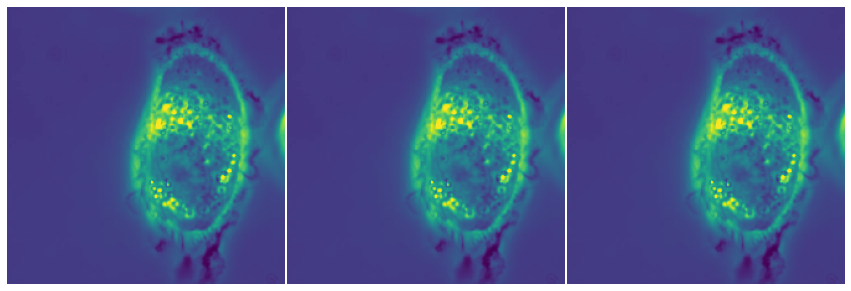

In [120]:
img = f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(img[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


 f2.shape:  (1, 224, 224, 64)


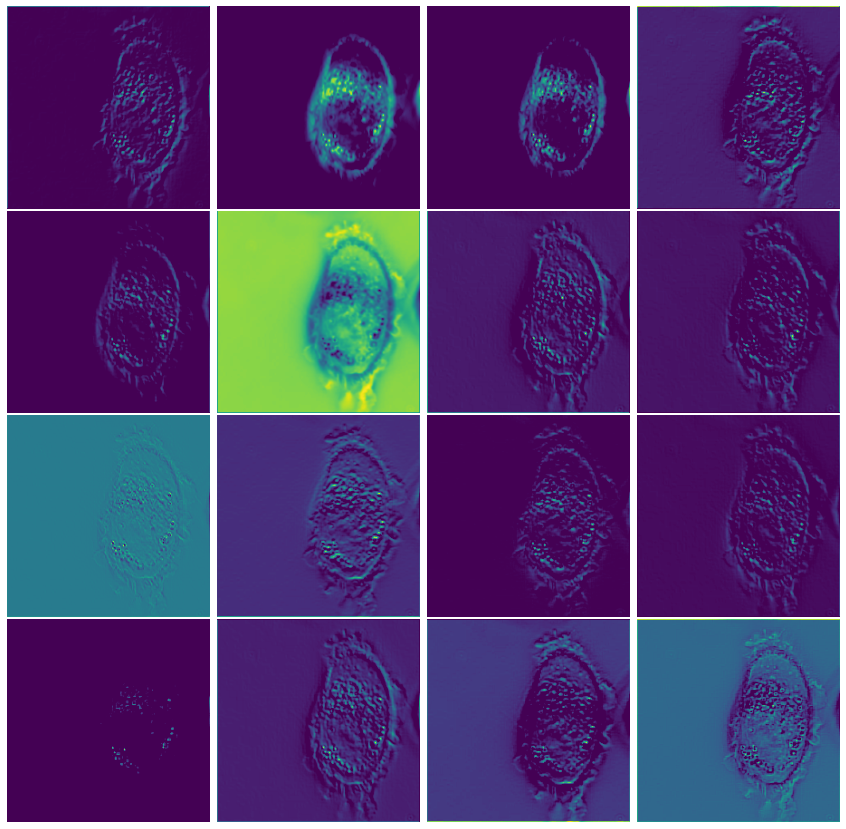

In [121]:
f2 = extracted_features[1]
print("\n f2.shape: ", f2.shape)

img = f2[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(img[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [122]:
extracted_features_block1_pool = Model(inputs=features.input, outputs=features.get_layer("block1_pool").output)
block1_pool_features = extracted_features_block1_pool.predict(x)

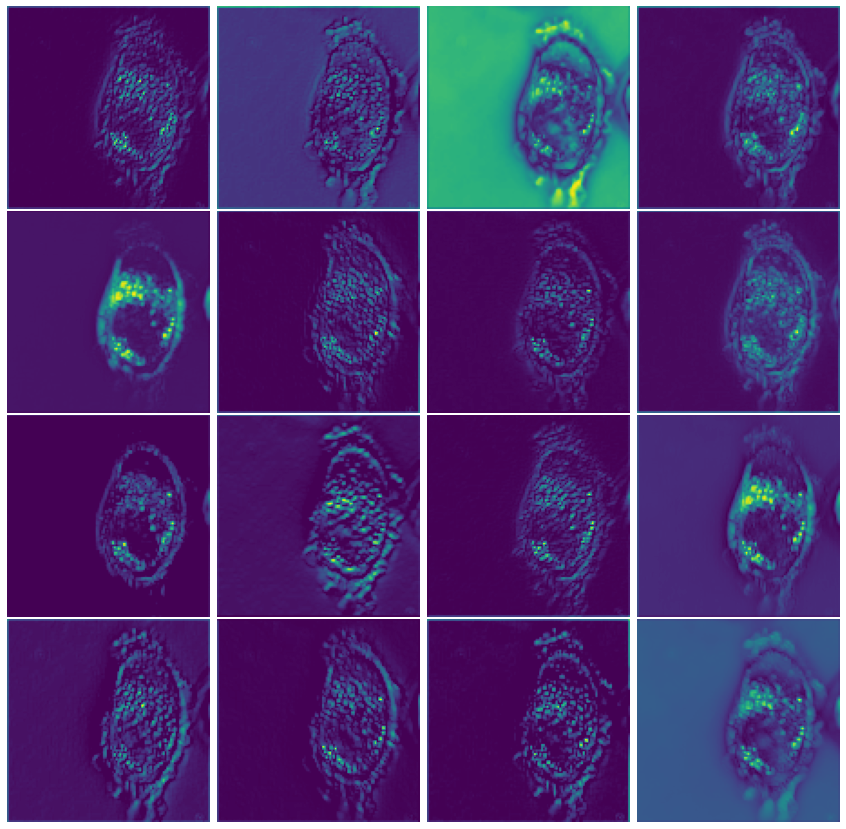

In [123]:
imgs = block1_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [124]:
extracted_features_block5_conv4 = Model(inputs=features.input, outputs=features.get_layer("block5_conv4").output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

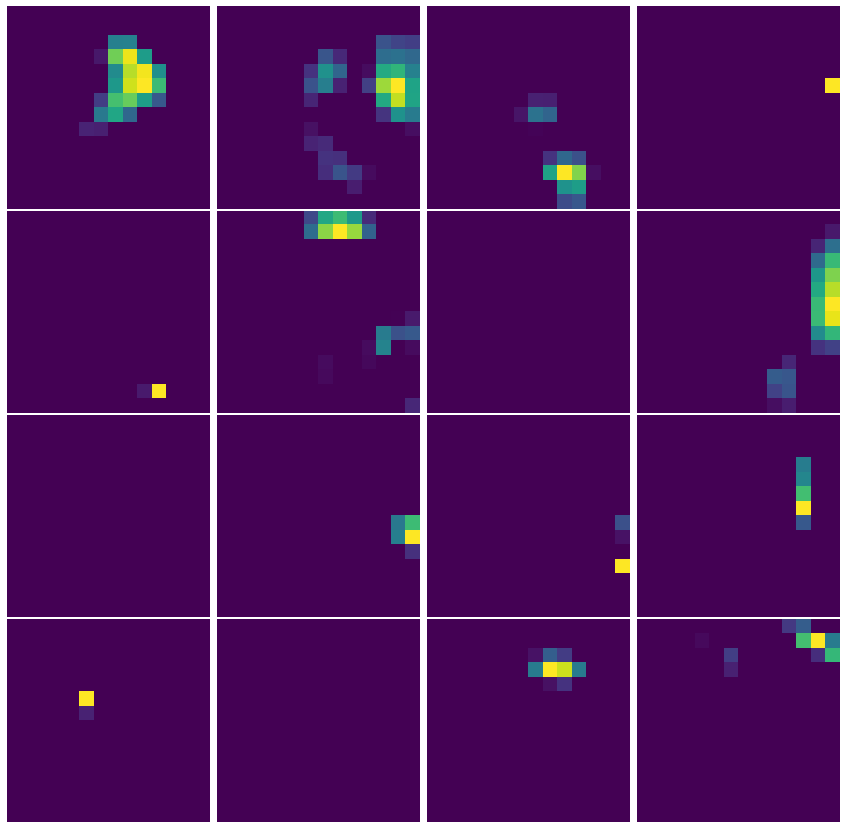

In [125]:
imgs = block5_conv4_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)